In [19]:
import pandas as pd
from seaborn import load_dataset
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# A perfect Case of Classification

In [2]:
iris_df = load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
px.bar(iris_df, x='species', color='species')

In [4]:
px.scatter_3d(iris_df, x='sepal_length', y='sepal_width', z='petal_length', color='species',symbol='species')

In [5]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Another Dataset

In [6]:
penguins_df = load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
px.bar(penguins_df, x='species', color='species')

Class Imbalance handling strategies
1. Oversampling
2. Undersampling

#### 1. Oversampling

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
print("original dataset:")
print(penguins_df.groupby('species').size())

original dataset:
species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


In [12]:
penguins_df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [18]:
penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
X = penguins_df[[
            'bill_length_mm',
            'bill_depth_mm',
            'flipper_length_mm',
            'body_mass_g',
            ]]
y= penguins_df['species']

In [20]:
imputer = SimpleImputer()
X = imputer.fit_transform(X)
cls_enc = LabelEncoder()
y = cls_enc.fit_transform(y)

In [22]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

In [25]:
y.shape

(344,)

In [26]:
y_resample.shape

(456,)

<AxesSubplot:xlabel='0'>

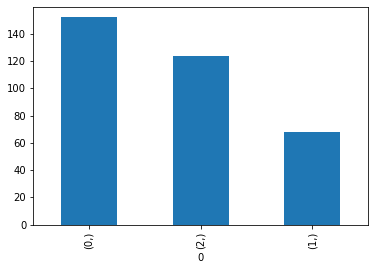

In [35]:
pd.DataFrame(y).value_counts().plot(kind='bar')

<AxesSubplot:xlabel='0'>

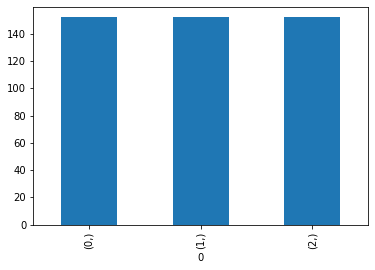

In [34]:
pd.DataFrame(y_resample).value_counts().plot(kind='bar')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

confusion matrix:
[[34  1  0]
 [ 1 26  0]
 [ 0  0 30]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.96      0.96      0.96        27
           2       1.00      1.00      1.00        30

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92

